<a href="https://colab.research.google.com/github/Cmaylu/Python-Project/blob/main/Proyecto_Python_An%C3%A1lisis_Descriptivo_y_Modelo_Predictivo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Proyecto Con Python**

Utilizando datos ficticios de una empresa de productos tecnológicos. El objetivo es explorar y visualizar los datos comerciales para obtener insights útiles mediante python. Ven y acompañame


Date (Fecha):

Descripción: Esta columna representa la fecha en la que se registró la venta.
Importancia: Permite realizar análisis temporales, identificar tendencias estacionales y proyectar ventas futuras. Al convertir estas fechas a un formato ordinal, se pueden utilizar en modelos predictivos para entender cómo la variable tiempo afecta a las ventas.

Discount (Descuento):

Descripción: Esta columna indica el porcentaje de descuento aplicado a un producto en el momento de la venta.
Importancia: Los descuentos pueden influir significativamente en el comportamiento de compra de los clientes.
Analizar esta variable ayuda a entender la relación entre el precio de los productos (después de aplicar el descuento) y las ventas, así como la efectividad de las estrategias de descuento.

Marketing Spend (Gasto en Marketing):

Descripción: Esta columna muestra el monto de dinero gastado en marketing para promocionar los productos.

Importancia: El gasto en marketing es crucial para atraer clientes y aumentar las ventas. Analizar esta variable permite evaluar la efectividad de las campañas de marketing y su impacto en las ventas. También ayuda a determinar si hay una correlación positiva entre el gasto en marketing y el incremento en las ventas.



***Análisis descriptivo***

**Paso 1:** Creación de Datos
Primero, generamos una tabla de datos que simule las ventas de una empresa de productos tecnológicos.

In [1]:
import pandas as pd
import numpy as np

# Configuración inicial
np.random.seed(42)

# Generación de fechas
dates = pd.date_range(start='2023-01-01', periods=1000, freq='D')

# Generación de categorías
categories = ['Laptop', 'Smartphone', 'Tablet', 'Accessory']

# Generación de regiones de venta
regions = ['North', 'South', 'East', 'West']

# Creación del DataFrame
data = {
    'Date': np.random.choice(dates, 1000),
    'Category': np.random.choice(categories, 1000),
    'Region': np.random.choice(regions, 1000),
    'Sales': np.random.randint(100, 5000, 1000),
    'Discount': np.random.uniform(0, 0.3, 1000),
    'Marketing_Spend': np.random.randint(1000, 50000, 1000)
}

df = pd.DataFrame(data)

# Guardar en un archivo CSV para simular la conexión a una tabla
df.to_csv('tech_sales_data.csv', index=False)

# Mostrar las primeras filas del DataFrame
df.head()

,Date,Category,Region,Sales,Discount,Marketing_Spend
0,2023-04-13,Laptop,South,506,0.116218,28526
1,2024-03-11,Laptop,West,1114,0.255552,8957
2,2025-05-10,Tablet,East,4531,0.121169,49564
3,2023-09-28,Accessory,North,1938,0.023284,34998
4,2023-04-17,Laptop,East,3288,0.162760,44395


**Paso 2:** Conexión y Lectura de Datos
Cargamos los datos desde el archivo CSV.

In [2]:
# Conectar y leer la tabla de datos
df = pd.read_csv('tech_sales_data.csv')

# Mostrar las primeras filas del DataFrame
df.head()

,Date,Category,Region,Sales,Discount,Marketing_Spend
0,2023-04-13,Laptop,South,506,0.116218,28526
1,2024-03-11,Laptop,West,1114,0.255552,8957
2,2025-05-10,Tablet,East,4531,0.121169,49564
3,2023-09-28,Accessory,North,1938,0.023284,34998
4,2023-04-17,Laptop,East,3288,0.162760,44395


**Paso 3:** Análisis Descriptivo
Realizamos un análisis descriptivo para entender mejor los datos.

In [3]:
# Resumen estadístico
summary = df.describe()

# Agrupar por categoría y sumar ventas
sales_by_category = df.groupby('Category')['Sales'].sum()

# Agrupar por región y sumar ventas
sales_by_region = df.groupby('Region')['Sales'].sum()

# Relación entre descuento y ventas
discount_sales_corr = df[['Discount', 'Sales']].corr()

# Mostrar los resultados
summary, sales_by_category, sales_by_region, discount_sales_corr

(             Sales     Discount  Marketing_Spend
 count  1000.000000  1000.000000      1000.000000
 mean   2522.840000     0.153616     25679.453000
 std    1406.692806     0.085169     14014.586192
 min     107.000000     0.000133      1016.000000
 25%    1288.750000     0.081460     13826.000000
 50%    2497.500000     0.157814     26084.500000
 75%    3775.000000     0.226660     37187.250000
 max    4995.000000     0.299914     49991.000000,
 Category
 Accessory     558624
 Laptop        676278
 Smartphone    624960
 Tablet        662978
 Name: Sales, dtype: int64,
 Region
 East     599516
 North    686621
 South    644790
 West     591913
 Name: Sales, dtype: int64,
           Discount     Sales
 Discount  1.000000  0.024655
 Sales     0.024655  1.000000)

**Paso 4:** Visualización de Datos
Utilizamos Matplotlib y Seaborn para visualizar los datos.

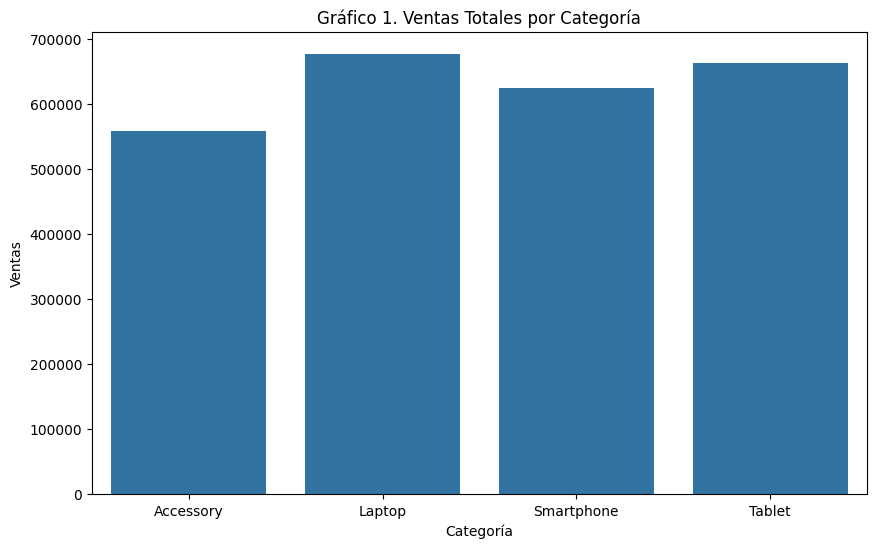

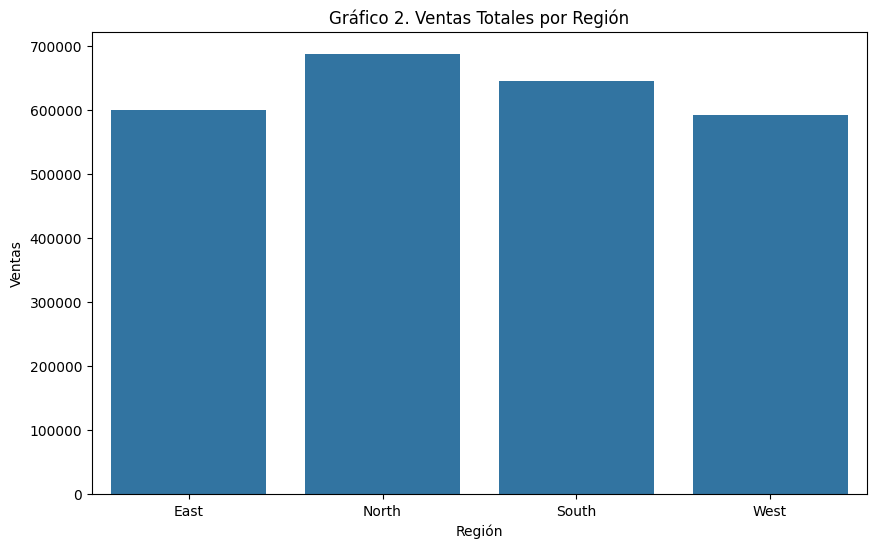

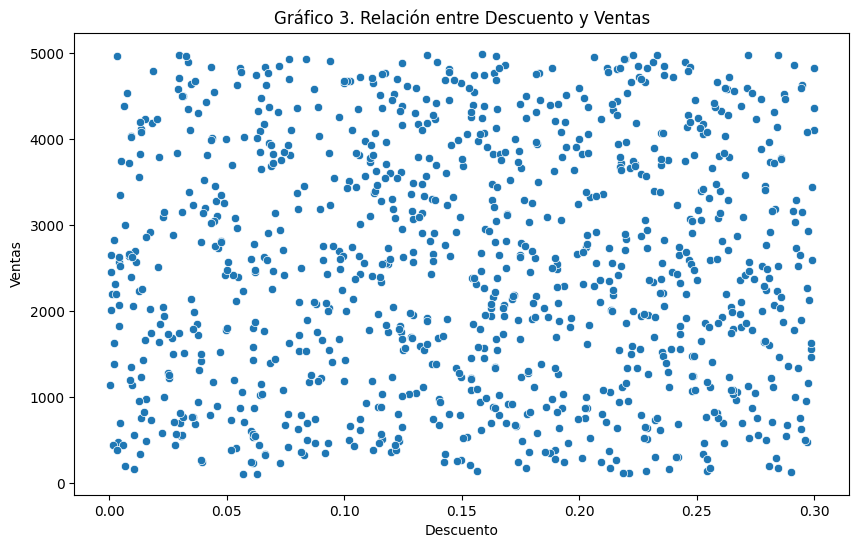

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns

# Ventas totales por categoría
plt.figure(figsize=(10, 6))
sns.barplot(x=sales_by_category.index, y=sales_by_category.values)
plt.title('Gráfico 1. Ventas Totales por Categoría')
plt.xlabel('Categoría')
plt.ylabel('Ventas')
plt.show()

# Ventas totales por región
plt.figure(figsize=(10, 6))
sns.barplot(x=sales_by_region.index, y=sales_by_region.values)
plt.title('Gráfico 2. Ventas Totales por Región')
plt.xlabel('Región')
plt.ylabel('Ventas')
plt.show()

# Relación entre descuento y ventas
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Discount', y='Sales', data=df)
plt.title('Gráfico 3. Relación entre Descuento y Ventas')
plt.xlabel('Descuento')
plt.ylabel('Ventas')
plt.show()

**Análisis de los Resultados**
Vamos a analizar los resultados obtenidos de nuestro análisis descriptivo y las visualizaciones.

**Resumen Estadístico:**

Proporciona información básica sobre la distribución de los datos, como la media, la desviación estándar, los valores mínimos y máximos, y los cuartiles.

Gráfico1. Ventas Totales por Categoría:Esta gráfica nos muestra cuál categoría de productos genera más ventas. Por ejemplo, podríamos descubrir que las laptops generan más ventas que los accesorios.

Gráfico2. Ventas Totales por Región: Esta gráfica nos ayuda a entender qué regiones están generando más ventas. Podríamos observar que la región 'North' tiene más ventas que la región 'South'.

Gráfico 3. Relación entre Descuento y Ventas:Este gráfico de dispersión nos muestra la relación entre el descuento y las ventas. Podríamos ver una tendencia donde mayores descuentos están asociados con mayores ventas, indicando una posible elasticidad de precio.

Este análisis descriptivo nos proporciona una visión general de los datos comerciales de esta empresa y nos ayuda a identificar patrones y tendencias clave.



Date (Fecha):

Permite identificar patrones y tendencias a lo largo del tiempo.
Ayuda a detectar estacionalidades (por ejemplo, puntos de ventas durante las festividades).

Discount (Descuento):

Facilita el análisis de cómo diferentes niveles de descuento afectan las ventas.
Permite evaluar la elasticidad del precio, es decir, cómo la variación del precio impacta la demanda.

Marketing Spend (Gasto en Marketing):

Permite analizar la relación entre el gasto en marketing y las ventas generadas.
Ayuda a optimizar el presupuesto de marketing, invirtiendo más en las estrategias que generan mayores ventas.